In [47]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [154]:
contests = pd.read_csv('data/WorkingData.csv', encoding='cp1252')
chunkMapDF = pd.read_csv('data/ChunkMap.csv')
abDF = pd.read_csv('data/AB_Preds.csv')

In [180]:
cid = contests[contests['Entries']>1000].iloc[4].ContestId
chunkName = chunkMapDF.loc[chunkMapDF['ContestId']==cid].iloc[0].Chunk

In [181]:
chunkDF = pd.read_csv('data/Chunks/'+chunkName+'.csv').drop(columns=['Unnamed: 0']).sort_values(by='MinutesRemaining', ascending=False)
seriesDF = chunkDF[chunkDF['ContestId']==cid]

In [182]:
X, Y = list(seriesDF.MinutesRemaining.max() - seriesDF.MinutesRemaining), list(seriesDF.Entries.cumsum())
xMax, yMax = X[-1:][0]*1.1, Y[-1:][0]*1.1
numToRemove = len(seriesDF[seriesDF['MinutesRemaining']<240])
xPred, yPred = X[:-numToRemove][-1:][0], Y[:-numToRemove][-1:][0]
xF, yF = X[-1:][0], Y[-1:][0]



In [183]:
theseAB = abDF[abDF['ContestId']==cid]
filterData = []
d = int(theseAB["Duration"])
for col in abDF.columns:
    if(col[0] == "A"):
        v = col[1:]
        A, B = float(theseAB["A"+v]), float(theseAB["B"+v])
        thisData = {'label':v, 'X':[], 'Y':[]}
        for i in range(0, d, 5):
            thisData['X'].append(i)
            thisData['Y'].append(A*np.exp(B*i))
        filterData.append(thisData)

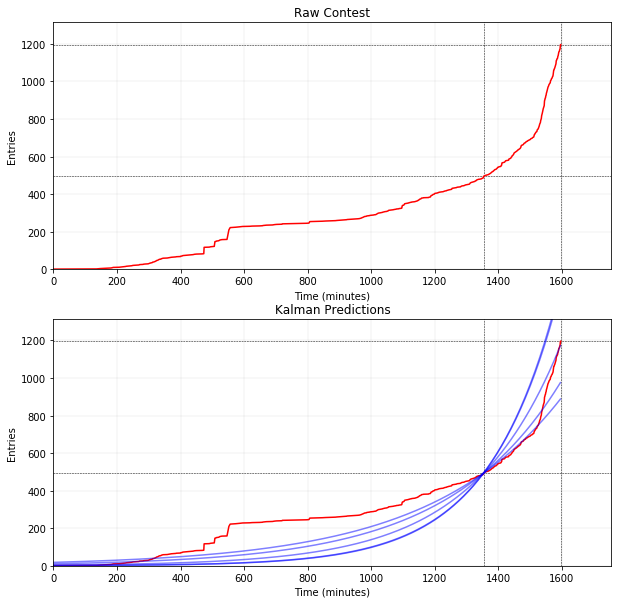

In [184]:
fig = plt.figure()
fig.set_size_inches(10, 10)

ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)



ax1.set_title('Raw Contest')
ax1.set_xlabel('Time (minutes)')
ax1.set_ylabel('Entries')
ax1.set_xlim(0,xMax)
ax1.set_ylim(0,yMax)
ax1.grid(color='black', linestyle='-', linewidth=.1, alpha=.5)
ax1.axvline(x=xPred, ls='--', linewidth=.5, color= "black")
ax1.axhline(y=yPred, ls='--', linewidth=.5, color= "black")
ax1.axvline(x=xF, ls='--', linewidth=.5, color= "black")
ax1.axhline(y=yF, ls='--', linewidth=.5, color= "black")
ax1.plot(X, Y, color='red')


ax2.set_title('Kalman Predictions')
ax2.set_xlabel('Time (minutes)')
ax2.set_ylabel('Entries')
ax2.set_xlim(0,xMax)
ax2.set_ylim(0,yMax)
ax2.grid(color='black', linestyle='-', linewidth=.1, alpha=.5)

ax2.axvline(x=xPred, ls='--', linewidth=.5, color= "black")
ax2.axhline(y=yPred, ls='--', linewidth=.5, color= "black")
ax2.axvline(x=xF, ls='--', linewidth=.5, color= "black")
ax2.axhline(y=yF, ls='--', linewidth=.5, color= "black")
ax2.plot(X, Y, color='red')
for d in filterData:
    ax2.plot(d['X'], d['Y'], alpha=.5, color='blue')
